# Bibliotecas

In [312]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import geopandas as gpd


## Entendimento e Visualização das Bases

## Dados Geográficos

In [313]:
mapa = gpd.read_file("bases_mapa/PE_Municipios_2023.shp")
mapa.head(1)

CD_MUN        NM_MUN  CD_RGI  NM_RGI CD_RGINT NM_RGINT CD_UF       NM_UF  \
0  2600054  Abreu e Lima  260001  Recife     2601   Recife    26  Pernambuco   

  CD_REGIAO NM_REGIAO CD_CONCURB NM_CONCURB  AREA_KM2  \
0         2  Nordeste    2611606  Recife/PE   126.384   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

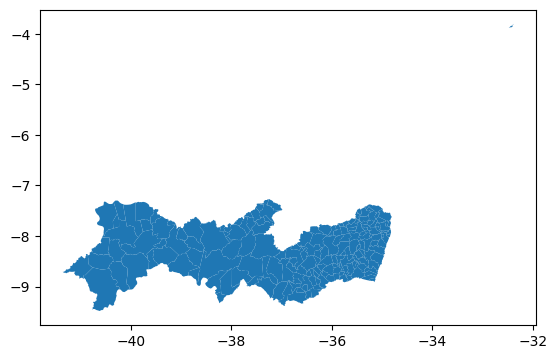

In [314]:
mapa.plot()
plt.show()

## Censo de Pernambuco

In [315]:
censo = pd.read_csv('censo.csv.gz')
censo.head()

,id_municipio,cor_raca,sexo,grupo_idade,alfabetizacao,populacao
0,1100023,Indígena,Homens,15 a 19 anos,Não alfabetizadas,NaN
1,1100262,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
2,1101005,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
3,1101435,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
4,1101435,Indígena,Mulheres,15 a 19 anos,Não alfabetizadas,NaN


In [316]:
ids = pd.read_csv('idmunicipio.csv.gz')
ids.head()

,id_municipio,id_municipio_6,id_municipio_tse,id_municipio_rf,id_municipio_bcb,nome,capital_uf,id_comarca,id_regiao_saude,nome_regiao_saude,id_regiao_imediata,nome_regiao_imediata,id_regiao_intermediaria,nome_regiao_intermediaria,id_microrregiao,nome_microrregiao,id_mesorregiao,nome_mesorregiao,id_regiao_metropolitana,nome_regiao_metropolitana,ddd,id_uf,sigla_uf,nome_uf,nome_regiao,amazonia_legal,centroide
0,1100338,110033,434,47,44516,Nova Mamoré,0,1100106,11004,Madeira-Mamoré,110001,Porto Velho,1101,Porto Velho,11001,Porto Velho,1101,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-64.6295025002404 -10.3822863210755)
1,1100205,110020,35,3,30719,Porto Velho,1,1100205,11004,Madeira-Mamoré,110001,Porto Velho,1101,Porto Velho,11001,Porto Velho,1101,Madeira-Guaporé,101,Região Metropolitana de Porto Velho,69,11,RO,Rondônia,Norte,1,POINT(-64.3041357999869 -9.15394033687075)
2,1101104,110110,493,683,46851,Itapuã do Oeste,0,1100205,11004,Madeira-Mamoré,110001,Porto Velho,1101,Porto Velho,11001,Porto Velho,1101,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-63.044960463046 -9.17019402601564)
3,1100809,110080,477,681,46961,Candeias do Jamari,0,1100205,11004,Madeira-Mamoré,110001,Porto Velho,1101,Porto Velho,11001,Porto Velho,1101,Madeira-Guaporé,101,Região Metropolitana de Porto Velho,69,11,RO,Rondônia,Norte,1,POINT(-63.3254198532114 -8.88702392955617)
4,1100940,110094,680,8,56652,Cujubim,0,1100023,11001,Vale do Jamari,110002,Ariquemes,1101,Porto Velho,11001,Porto Velho,1101,Madeira-Guaporé,NaN,NaN,69,11,RO,Rondônia,Norte,1,POINT(-62.5652673033848 -9.1709863446154)


In [317]:
# Filtrar censo para estado de Pernambuco
ids_pernambuco = ids.loc[ids['sigla_uf']=='PE']
municipios = (ids_pernambuco['id_municipio']).tolist()

censo_pe = censo.loc[censo['id_municipio'].isin(municipios)]
censo_pe.head()

,id_municipio,cor_raca,sexo,grupo_idade,alfabetizacao,populacao
238,2607307,Indígena,Homens,15 a 19 anos,Não alfabetizadas,NaN
239,2603405,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
240,2603405,Indígena,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
241,2607109,Preta,Mulheres,15 a 19 anos,Não alfabetizadas,NaN
242,2612802,Amarela,Homens,15 a 19 anos,Alfabetizadas,NaN


In [318]:
# Deletar tabela anterior que não será mais usada
import gc
del censo
gc.collect()

92497

In [319]:
censo_pe.shape

(25900, 6)

In [320]:
censo_pe.isna().sum()

id_municipio        0
cor_raca            0
sexo                0
grupo_idade         0
alfabetizacao       0
populacao        6056
dtype: int64

In [321]:
dados_censo = censo_pe.merge(ids[['nome', 'id_municipio']], on='id_municipio')
dados_censo.head()

,id_municipio,cor_raca,sexo,grupo_idade,alfabetizacao,populacao,nome
0,2607307,Indígena,Homens,15 a 19 anos,Não alfabetizadas,NaN,Ipubi
1,2603405,Amarela,Mulheres,15 a 19 anos,Não alfabetizadas,NaN,Calumbi
2,2603405,Indígena,Mulheres,15 a 19 anos,Não alfabetizadas,NaN,Calumbi
3,2607109,Preta,Mulheres,15 a 19 anos,Não alfabetizadas,NaN,Ingazeira
4,2612802,Amarela,Homens,15 a 19 anos,Alfabetizadas,NaN,Santa Terezinha


In [322]:
dados_censo.isna().sum()

id_municipio        0
cor_raca            0
sexo                0
grupo_idade         0
alfabetizacao       0
populacao        6056
nome                0
dtype: int64

In [323]:
dados_censo.describe()

,id_municipio,populacao
count,2.590000e+04,19844.000000
mean,2.608241e+06,360.941695
std,4.689132e+03,1780.507128
min,2.600054e+06,1.000000
25%,2.604205e+06,8.000000
50%,2.608206e+06,63.000000
75%,2.612307e+06,247.000000
max,2.616506e+06,60119.000000


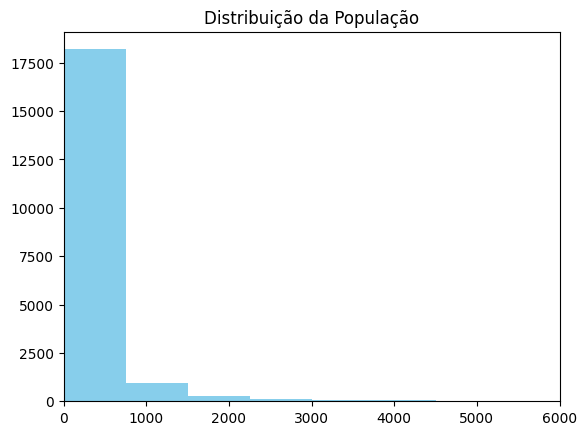

In [324]:
plt.hist(dados_censo['populacao'], bins=80, color='skyblue')
plt.xlim(0,6000)
plt.title('Distribuição da População')
plt.show()

## Resultados da Eleição em Pernambuco de 2022

In [325]:
import csv

votos = pd.read_csv('votacao.csv', quoting=csv.QUOTE_NONE, sep=';', encoding='ISO-8859-1', on_bad_lines='skip')
votos.head()

,"""DT_GERACAO""","""HH_GERACAO""","""ANO_ELEICAO""","""CD_TIPO_ELEICAO""","""NM_TIPO_ELEICAO""","""NR_TURNO""","""CD_ELEICAO""","""DS_ELEICAO""","""DT_ELEICAO""","""TP_ABRANGENCIA""","""SG_UF""","""SG_UE""","""NM_UE""","""CD_MUNICIPIO""","""NM_MUNICIPIO""","""NR_ZONA""","""NR_SECAO""","""CD_CARGO""","""DS_CARGO""","""NR_VOTAVEL""","""NM_VOTAVEL""","""QT_VOTOS""","""NR_LOCAL_VOTACAO""","""SQ_CANDIDATO""","""NM_LOCAL_VOTACAO""","""DS_LOCAL_VOTACAO_ENDERECO"""
0,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""","""PE""","""PE""","""PERNAMBUCO""","""24570""","""JABOATÃO DOS GUARARAPES""","""147""","""336""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""2""","""1457""","""170001610736""","""ESCOLA MUNICIPAL NATIVIDADE SALDANHA""","""RUA DO FUTURO, S/N"""
1,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""","""PE""","""PE""","""PERNAMBUCO""","""24279""","""GRAVATÁ""","""30""","""152""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1112""","""170001610736""","""ESCOLA DE REFERÊNCIA EM ENSINO MÉDIO PROF. ANTONIO FARIAS - EREMPAF""","""RUA QUINTINO BOCAIUVA, SN"""
2,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""","""PE""","""PE""","""PERNAMBUCO""","""24350""","""IGARASSU""","""85""","""25""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1066""","""170001610736""","""ESCOLA ESTADUAL JOÃO PESSOA GUERRA""","""RUA ALFREDO BANDEIRA DE MELO, S/N"""
3,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""","""PE""","""PE""","""PERNAMBUCO""","""25313""","""RECIFE""","""8""","""281""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1759""","""170001610736""","""COLÉGIO TRIUNFO""","""R. DO TRIUNFO, 647"""
4,"""01/11/2022""","""16:05:25""","""2022""","""2""","""ELEIÇÃO ORDINÁRIA""","""1""","""546""","""ELEIÇÕES GERAIS ESTADUAIS 2022""","""02/10/2022""","""E""","""PE""","""PE""","""PERNAMBUCO""","""23795""","""CARPINA""","""20""","""96""","""7""","""DEPUTADO ESTADUAL""","""77234""","""UBIRATAN OLIMPIO DA SILVA""","""1""","""1171""","""170001610736""","""COLÉGIO SALESIANO""","""AV. PADRE ROCHA, 500"""


In [326]:
votos_deputado = votos.loc[votos['"DS_CARGO"']=='"DEPUTADO FEDERAL"']
print(f"No total, a base possui {len(votos)} votos, sendo {len(votos_deputado)} para Deputado Federal.")

No total, a base possui 2740379 votos, sendo 1118705 para Deputado Federal.


In [327]:
del votos
gc.collect()

8444

In [328]:
to_drop = ['"ANO_ELEICAO"', '"CD_TIPO_ELEICAO"', '"NM_TIPO_ELEICAO"', '"NR_TURNO"', '"CD_ELEICAO"',
'"DS_ELEICAO"','"DT_ELEICAO"', '"TP_ABRANGENCIA"', '"SG_UF"', '"SG_UE"', '"NM_UE"',
'"CD_CARGO"', '"DS_CARGO"', '"DT_GERACAO"']

votos_deputado = votos_deputado.drop(columns=(to_drop))

for col in votos_deputado.columns:
    if votos_deputado[col].dtype == 'object':
        votos_deputado[col] = votos_deputado[col].str.replace('"', '', regex=False)

votos_deputado.columns = votos_deputado.columns.str.replace('"', '', regex=False)

votos_deputado['QT_VOTOS'] = votos_deputado['QT_VOTOS'].astype(int)

votos_deputado.columns

Index(['HH_GERACAO', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO'],
      dtype='object')

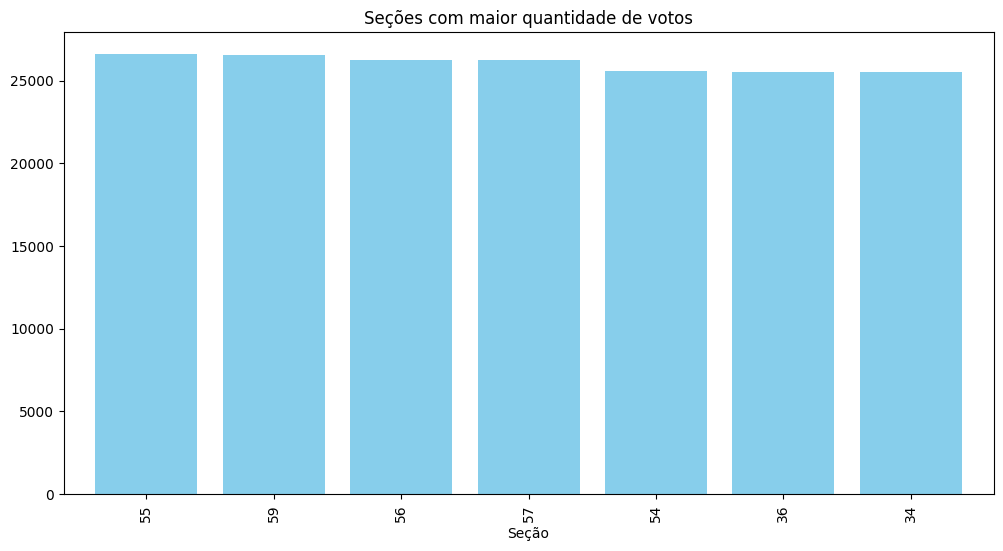

In [329]:
votos_secao = votos_deputado.groupby('NR_SECAO')['QT_VOTOS'].sum().sort_values(ascending=False)
maisvotos = votos_secao.head(7)
plt.figure(figsize=(12,6))
maisvotos.plot(kind='bar', width=0.8, color='skyblue')
plt.title("Seções com maior quantidade de votos")
plt.xlabel("Seção")
plt.show()

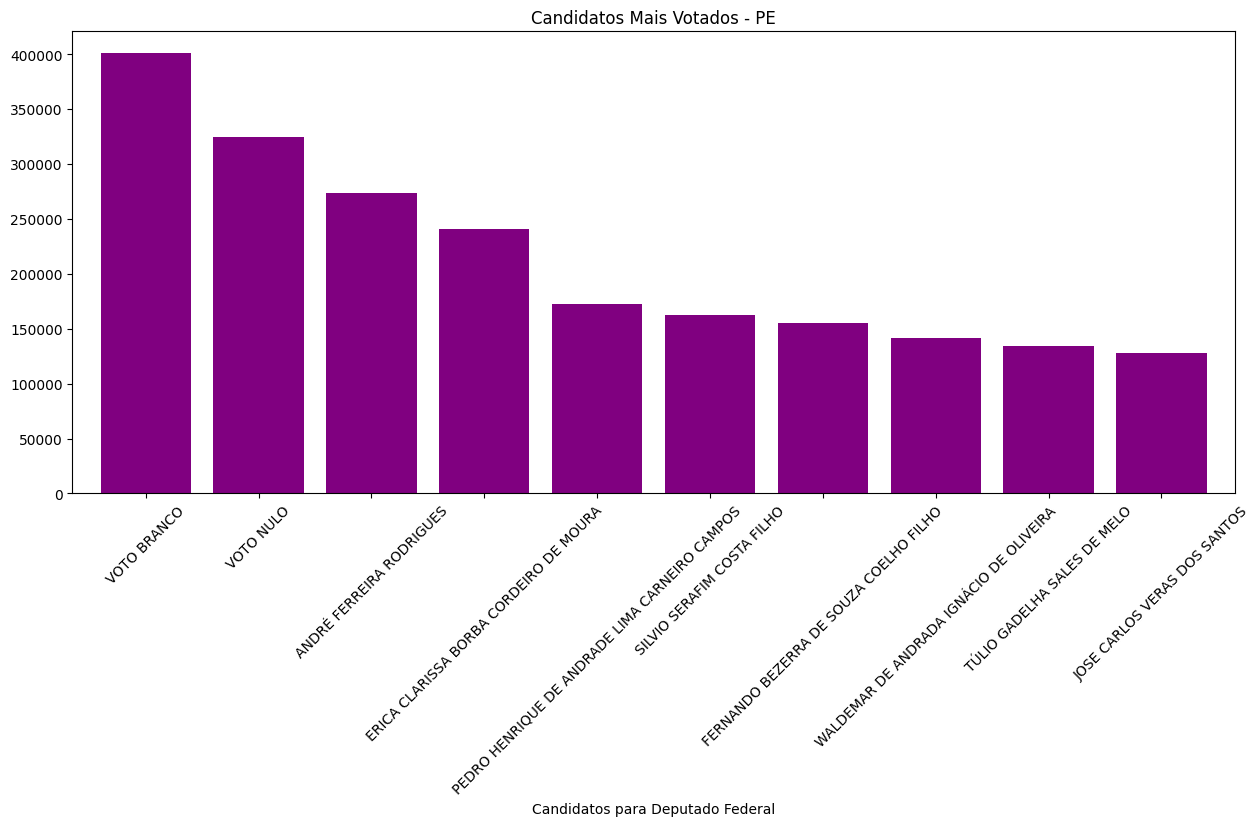

In [330]:
votos_candidatos = votos_deputado.groupby('NM_VOTAVEL')['QT_VOTOS'].sum().sort_values(ascending=False)
candidatos_mais_votados = votos_candidatos.head(10)

plt.figure(figsize=(15,6))
candidatos_mais_votados.plot(kind='bar', width=0.8, color='purple')
plt.title('Candidatos Mais Votados - PE')
plt.xlabel("Candidatos para Deputado Federal")
plt.xticks(rotation=45)
plt.show()

In [331]:
votos_deputado.isna().sum()

HH_GERACAO                   0
CD_MUNICIPIO                 0
NM_MUNICIPIO                 0
NR_ZONA                      0
NR_SECAO                     0
NR_VOTAVEL                   0
NM_VOTAVEL                   0
QT_VOTOS                     0
NR_LOCAL_VOTACAO             0
SQ_CANDIDATO                 0
NM_LOCAL_VOTACAO             0
DS_LOCAL_VOTACAO_ENDERECO    0
dtype: int64

## Instituições de Ensino superior

In [332]:
instituicoes = pd.read_csv('instituicoesSuperior.csv')
instituicoes.head()

,Código Mantenedora,Razão Social,CNPJ,Natureza Jurídica,Código IES,Instituição(IES),Sigla,Telefone,Sitio,e-Mail,Endereço Sede,Município,UF,Organização Acadêmica,Tipo de Credenciamento,Categoria,Categoria Administrativa,Data do Ato de Criação da IES,CI,Ano CI,CI-EaD,Ano CI-EaD,IGC,Ano IGC,Reitor/Dirigente Principal,Representante Legal,Sinalizações Vigentes,Situação da IES
0,1336,ITPAC INSTITUTO TOCANTINENSE PRESIDENTE ANTONIO CARLOS S.A,02.941.990/0001-98,Privada com fins lucrativos,5580,Afya Faculdade de Ciências Médicas de Garanhuns (Sub Judice) (AFYA GARANHUNS),AFYA GARANHUNS,(81) 4040-4242,https://www.fameg.com.br/,adriene.jacinto@afya.com.br; gabriele.duraes@afya.com.br; luiz.pereira@afya.com.br,Avenida General Costa e Silva - 06 - CEP: 55297-130 - Novo Heliópolis,Garanhuns,PE,Faculdade,Presencial - Superior,Privada,Privada com fins lucrativos,13/11/2007,4,2023.0,-,NaN,-,NaN,NaN,NaN,NaN,Ativa
1,759,SOCIEDADE EDUCACIONAL E CULTURAL SERGIPE DEL REY LTDA,32.728.800/0001-10,Privada com fins lucrativos,22514,Afya Faculdade de Ciências Médicas de Jaboatão dos Guararapes (AFYA JABOATÃO),AFYA JABOATÃO,(81) 996689915,https://jaboatao.afya.com.br/,vanessa.piasson@afya.com.br,Avenida General Barreto de Menezes - 738 - CEP: 54330-000 - Cajueiro Seco - Piedade,Jaboatão dos Guararapes,PE,Faculdade,Presencial - Superior,Privada,Privada com fins lucrativos,09/02/2018,5,2022.0,-,NaN,-,NaN,NaN,NaN,NaN,Ativa
2,57,AUTARQUIA DE ENSINO SUPERIOR DE ARCOVERDE,11.462.454/0001-09,Pessoa Jurídica de Direito Público - Municipal,73,CENTRO DE ENSINO SUPERIOR DE ARCOVERDE (CESA),CESA,(87)3821-0644 / (87)9927-4392,www.aesa-cesa.br,direcaocesa@hotmail.com,Rua Gumercindo Cavalcanti - 420 - CEP: 56512-902 - SÃO CRISTOVÃO,Arcoverde,PE,Faculdade,Presencial - Superior,Publica,Especial,07/08/1969,-,NaN,-,NaN,2,2022.0,NaN,NaN,NaN,Ativa
3,446,AUTARQUIA BELEMITA DE CULTURA DESPORTOS E EDUCACAO,10.264.877/0001-43,Pessoa Jurídica de Direito Público - Municipal,674,CENTRO DE ENSINO SUPERIOR DO VALE SÃO FRANCISCO (CESVASF),CESVASF,(87)38761248,www.cesvasf.com.br,secretaria@cesvasf.com.br,BR 316 - Campus Alto do Encanto - s/n - CEP: 56440-000 - Nova Olinda,Belém de São Francisco,PE,Faculdade,Presencial - Superior,Publica,Especial,15/03/1975,-,NaN,-,NaN,3,2022.0,NaN,NaN,NaN,Ativa
4,276,AESO-ENSINO SUPERIOR DE OLINDA LTDA,09.726.365/0001-72,Privada com fins lucrativos,4420,Centro Universitário Aeso - Barros Melo (Uniaeso),Uniaeso,(81) 2128 9797,www.barrosmelo.edu.br,aeso@aeso.br,Avenida Transamazônica - 405 - CEP: 53300-240 - Jardim Brasil II,Olinda,PE,Centro Universitário,EAD - Superior / Presencial - Superior,Privada,Privada com fins lucrativos,15/05/1968,5,2019.0,5,2019.0,3,2022.0,NaN,NaN,NaN,Ativa


In [333]:
instituicoesLimpo = instituicoes[["Instituição(IES)", "Endereço Sede", "Município"]]
instituicoesLimpo.head()

,Instituição(IES),Endereço Sede,Município
0,Afya Faculdade de Ciências Médicas de Garanhuns (Sub Judice) (AFYA GARANHUNS),Avenida General Costa e Silva - 06 - CEP: 55297-130 - Novo Heliópolis,Garanhuns
1,Afya Faculdade de Ciências Médicas de Jaboatão dos Guararapes (AFYA JABOATÃO),Avenida General Barreto de Menezes - 738 - CEP: 54330-000 - Cajueiro Seco - Piedade,Jaboatão dos Guararapes
2,CENTRO DE ENSINO SUPERIOR DE ARCOVERDE (CESA),Rua Gumercindo Cavalcanti - 420 - CEP: 56512-902 - SÃO CRISTOVÃO,Arcoverde
3,CENTRO DE ENSINO SUPERIOR DO VALE SÃO FRANCISCO (CESVASF),BR 316 - Campus Alto do Encanto - s/n - CEP: 56440-000 - Nova Olinda,Belém de São Francisco
4,Centro Universitário Aeso - Barros Melo (Uniaeso),Avenida Transamazônica - 405 - CEP: 53300-240 - Jardim Brasil II,Olinda


In [334]:
instituicoesLimpo.isna().sum()

Instituição(IES)    0
Endereço Sede       0
Município           0
dtype: int64

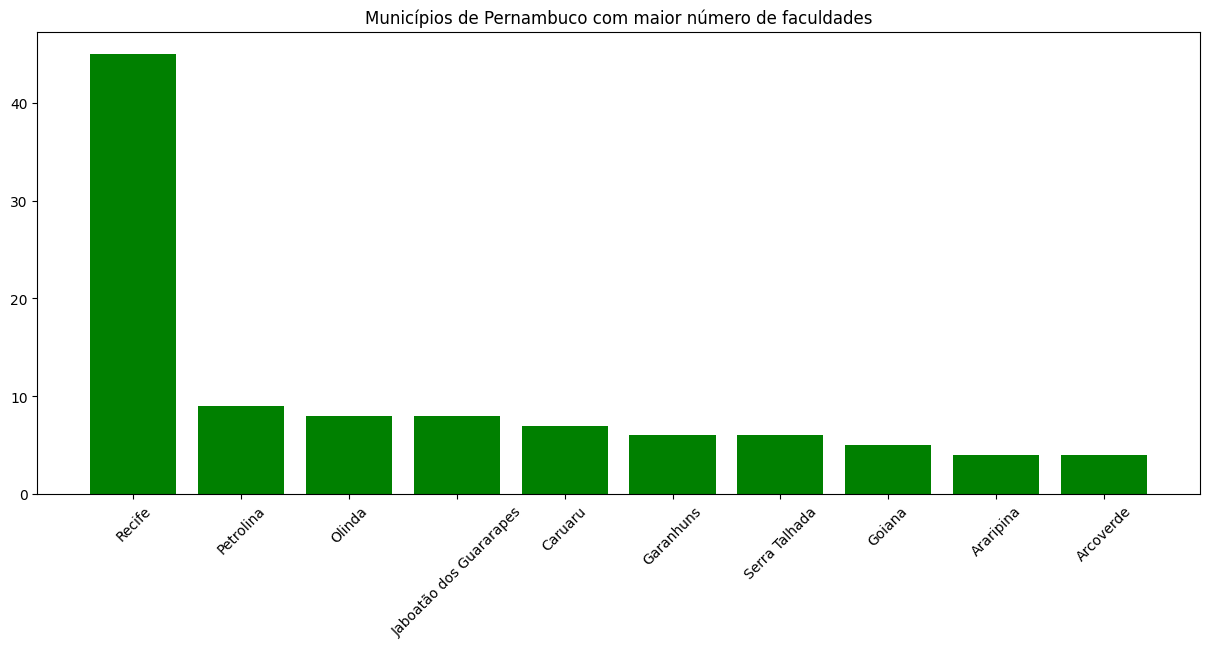

In [346]:
municipios = instituicoesLimpo['Município'].value_counts(ascending=False).head(10)
plt.figure(figsize=(15,6))
plt.bar(municipios.index, municipios.values, color='green')
plt.title('Municípios de Pernambuco com maior número de faculdades')
plt.xticks(rotation=45)
plt.show()

# Engenharia de Dados

### Dados TSE

In [260]:
votos_deputado.columns

Index(['HH_GERACAO', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO'],
      dtype='object')

In [261]:
votos_deputado['NM_VOTAVEL'].nunique()

466

In [262]:
votos_candidatos.head(20)

NM_VOTAVEL
VOTO BRANCO                                            400687
VOTO NULO                                              324967
ANDRÉ FERREIRA RODRIGUES                               273267
ERICA CLARISSA BORBA CORDEIRO DE MOURA                 240511
PEDRO HENRIQUE DE ANDRADE LIMA CARNEIRO CAMPOS         172526
SILVIO SERAFIM COSTA FILHO                             162056
FERNANDO BEZERRA DE SOUZA COELHO FILHO                 155305
WALDEMAR DE ANDRADA IGNÁCIO DE OLIVEIRA                141386
TÚLIO GADELHA SALES DE MELO                            134391
JOSE CARLOS VERAS DOS SANTOS                           127482
EDUARDO HENRIQUE DA FONTE DE ALBUQUERQUE SILVA         124850
CLODOALDO MAGALHÃES OLIVEIRA LYRA                      110620
DANIEL PIRES COELHO                                    110511
MARIA LEAL ARRAES DE ALENCAR                           104571
AUGUSTO RODRIGUES COUTINHO DE MELO                     101142
FRANCISCO EURICO DA SILVA                              1002

In [263]:
direita = [
    'ANDRÉ FERREIRA RODRIGUES', 'ERICA CLARISSA BORBA CORDEIRO DE MOURA',
    'SILVIO SERAFIM COSTA FILHO', 'FERNANDO BEZERRA DE SOUZA COELHO FILHO',
    'EDUARDO HENRIQUE DA FONTE DE ALBUQUERQUE SILVA',
    'DANIEL PIRES COELHO', 'AUGUSTO RODRIGUES COUTINHO DE MELO',
    'FRANCISCO EURICO DA SILVA', 'JOSE ERIBERTO MEDEIROS DE OLIVEIRA',
    'LUIZ EDUARDO DE QUEIROZ CAMPOS DA FONTE ALBUQUERQUE'
]

centro = [
    'PEDRO HENRIQUE DE ANDRADE LIMA CARNEIRO CAMPOS', 'WALDEMAR DE ANDRADA IGNÁCIO DE OLIVEIRA',
    'TÚLIO GADELHA SALES DE MELO', 'IZA ARRUDA',
    'FERNANDO MONTEIRO DE ALBUQUERQUE', 'IZA PAULA DE DEUS E MELLO ALBUQUERQUE ARRUDA'
]

esquerda = [
    'JOSE CARLOS VERAS DOS SANTOS', 'CLODOALDO MAGALHÃES OLIVEIRA LYRA',
    'MARIA LEAL ARRAES DE ALENCAR'
]

In [264]:
votos_deputado = votos_deputado[['CD_MUNICIPIO', 'NM_VOTAVEL', 'QT_VOTOS']]

votos_municipio = votos_deputado.groupby(['CD_MUNICIPIO', 'NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()
votos_municipio['esquerda'] = np.zeros(votos_municipio.shape[0])
votos_municipio['direita'] = np.zeros(votos_municipio.shape[0])
votos_municipio['centro'] = np.zeros(votos_municipio.shape[0])

def partidos(row):
    if(row['NM_VOTAVEL'].isin(esquerda)):
        row['esquerda']+=1
    elif(row['NM_VOTAVEL'].isin(direita)):
        row['direita']+=1
    elif(row['NM_VOTAVEL'].isin(centro)):
        row['centro']+=19

votos_municipio.head()

,CD_MUNICIPIO,NM_VOTAVEL,QT_VOTOS,esquerda,direita,centro
0,23000,ALEXANDRE SENA DE ALMEIDA,2,0.0,0.0,0.0
1,23000,ALINE LEMOS CORRÊA DE OLIVEIRA ANDRADE,1,0.0,0.0,0.0
2,23000,ANA KARLA PEREIRA DA SILVA NEVES DE SOUZA,1,0.0,0.0,0.0
3,23000,ANDREZA BANDEIRA FERREIRA DE OLIVEIRA MELO,3,0.0,0.0,0.0
4,23000,ANDRÉ FERREIRA RODRIGUES,79,0.0,0.0,0.0


In [265]:
votos_municipio['esquerda'] = votos_municipio['NM_VOTAVEL'].apply(lambda x: 1 if x in esquerda else 0)
votos_municipio['direita'] = votos_municipio['NM_VOTAVEL'].apply(lambda x: 1 if x in direita else 0)
votos_municipio['centro'] = votos_municipio['NM_VOTAVEL'].apply(lambda x: 1 if x in centro else 0)

In [266]:
votos_municipio.head()

,CD_MUNICIPIO,NM_VOTAVEL,QT_VOTOS,esquerda,direita,centro
0,23000,ALEXANDRE SENA DE ALMEIDA,2,0,0,0
1,23000,ALINE LEMOS CORRÊA DE OLIVEIRA ANDRADE,1,0,0,0
2,23000,ANA KARLA PEREIRA DA SILVA NEVES DE SOUZA,1,0,0,0
3,23000,ANDREZA BANDEIRA FERREIRA DE OLIVEIRA MELO,3,0,0,0
4,23000,ANDRÉ FERREIRA RODRIGUES,79,0,1,0


In [267]:
votos_municipio['esquerda'] = votos_municipio.apply(
    lambda row: row['QT_VOTOS'] if row['NM_VOTAVEL'] in esquerda else 0, axis=1
)
votos_municipio['direita'] = votos_municipio.apply(
    lambda row: row['QT_VOTOS'] if row['NM_VOTAVEL'] in direita else 0, axis=1
)
votos_municipio['centro'] = votos_municipio.apply(
    lambda row: row['QT_VOTOS'] if row['NM_VOTAVEL'] in centro else 0, axis=1
)

In [268]:
votos_municipio.head()

,CD_MUNICIPIO,NM_VOTAVEL,QT_VOTOS,esquerda,direita,centro
0,23000,ALEXANDRE SENA DE ALMEIDA,2,0,0,0
1,23000,ALINE LEMOS CORRÊA DE OLIVEIRA ANDRADE,1,0,0,0
2,23000,ANA KARLA PEREIRA DA SILVA NEVES DE SOUZA,1,0,0,0
3,23000,ANDREZA BANDEIRA FERREIRA DE OLIVEIRA MELO,3,0,0,0
4,23000,ANDRÉ FERREIRA RODRIGUES,79,0,79,0


In [269]:
resumo_politico = votos_municipio.groupby('CD_MUNICIPIO')[['esquerda', 'direita', 'centro']].sum()
resumo_politico = resumo_politico.astype(int)
resumo_politico.head()

,esquerda,direita,centro
CD_MUNICIPIO,,,
23000,805,207,2584
23019,2210,1369,6460
23027,592,3722,1949
23035,172,1823,6341
23043,1843,3136,604


In [270]:
resumo_politico = resumo_politico.astype(int)
resumo_politico[:] = resumo_politico.apply(
    lambda row: pd.Series([1 if col == row.idxmax() else 0 for col in resumo_politico.columns], index=resumo_politico.columns),
    axis=1
)

In [271]:
resumo_politico.reset_index(inplace=True)
resumo_politico.rename(columns={'index': 'CD_MUNICIPIO'}, inplace=True)
resumo_politico.columns

Index(['CD_MUNICIPIO', 'esquerda', 'direita', 'centro'], dtype='object')

In [272]:
resumo_politico.head(10)

,CD_MUNICIPIO,esquerda,direita,centro
0,23000,0,0,1
1,23019,0,0,1
2,23027,0,1,0
3,23035,0,0,1
4,23043,0,1,0
5,23051,0,1,0
6,23060,0,1,0
7,23078,1,0,0
8,23086,1,0,0
9,23094,1,0,0


### Dados Censo

In [273]:
grupo_idade_map = {
    '15 a 19 anos': 1,
    '20 a 24 anos': 2,
    '25 a 34 anos': 3,
    '35 a 44 anos': 4,
    '45 a 54 anos': 5,
    '55 a 64 anos': 6,
    '65 anos ou mais': 7
}

alfabetizacao_map = {
    'Não alfabetizadas': 0,
    'Alfabetizadas': 1
}

# Transformando as colunas
censo_pe['grupo_idade_numerico'] = censo_pe['grupo_idade'].map(grupo_idade_map)
censo_pe['alfabetizacao_numerico'] = censo_pe['alfabetizacao'].map(alfabetizacao_map)

In [274]:
censo_pe = censo_pe.drop(columns=['cor_raca', 'sexo', 'grupo_idade', 'alfabetizacao', 'populacao'])

In [275]:
censo_pe['adulto_analfabeto'] = ((censo_pe['grupo_idade_numerico'] > 1) & (censo_pe['alfabetizacao_numerico'] == 0)).astype(int)

resultado = censo_pe.groupby('id_municipio')['adulto_analfabeto'].mean().reset_index(name='proporcao_adulto_analfabeto')

resultado.head()

,id_municipio,proporcao_adulto_analfabeto
0,2600054,0.428571
1,2600104,0.428571
2,2600203,0.428571
3,2600302,0.428571
4,2600401,0.428571


### Dados Instituição

In [276]:
instituicoesLimpo = instituicoesLimpo.rename(columns={'Instituição(IES)':'instituicao', 'Endereço Sede':'endereco', 'Município':'nome'})
ids_pernambuco = ids_pernambuco[['nome', 'id_municipio']]

instituicoes_id = instituicoesLimpo.merge(ids_pernambuco, on='nome')
instituicoes_id.head(2)

,instituicao,endereco,nome,id_municipio
0,Afya Faculdade de Ciências Médicas de Garanhuns (Sub Judice) (AFYA GARANHUNS),Avenida General Costa e Silva - 06 - CEP: 55297-130 - Novo Heliópolis,Garanhuns,2606002
1,Afya Faculdade de Ciências Médicas de Jaboatão dos Guararapes (AFYA JABOATÃO),Avenida General Barreto de Menezes - 738 - CEP: 54330-000 - Cajueiro Seco - Piedade,Jaboatão dos Guararapes,2607901


In [277]:
instituicoes_id.isna().sum()

instituicao     0
endereco        0
nome            0
id_municipio    0
dtype: int64

In [278]:
import pandas as pd

def formatar_endereco(endereco):
   
    partes = endereco.split(' - ')

    if len(partes) < 4:
        return None
    
    rua = partes[0]
    numero = partes[1]

    if 'CEP:' not in partes[2]:
        return None
    cep = partes[2].split(': ')[1]
    
    bairro = partes[3]
    
    endereco_formatado = f"{rua}, {numero} - {bairro}, Pernambuco - PE, {cep}"
    
    return endereco_formatado

instituicoes_id['endereco_formatado'] = instituicoes_id['endereco'].apply(formatar_endereco)

instituicoes_id.head()

,instituicao,endereco,nome,id_municipio,endereco_formatado
0,Afya Faculdade de Ciências Médicas de Garanhuns (Sub Judice) (AFYA GARANHUNS),Avenida General Costa e Silva - 06 - CEP: 55297-130 - Novo Heliópolis,Garanhuns,2606002,"Avenida General Costa e Silva, 06 - Novo Heliópolis, Pernambuco - PE, 55297-130"
1,Afya Faculdade de Ciências Médicas de Jaboatão dos Guararapes (AFYA JABOATÃO),Avenida General Barreto de Menezes - 738 - CEP: 54330-000 - Cajueiro Seco - Piedade,Jaboatão dos Guararapes,2607901,"Avenida General Barreto de Menezes, 738 - Cajueiro Seco, Pernambuco - PE, 54330-000"
2,CENTRO DE ENSINO SUPERIOR DE ARCOVERDE (CESA),Rua Gumercindo Cavalcanti - 420 - CEP: 56512-902 - SÃO CRISTOVÃO,Arcoverde,2601201,"Rua Gumercindo Cavalcanti, 420 - SÃO CRISTOVÃO, Pernambuco - PE, 56512-902"
3,Centro Universitário Aeso - Barros Melo (Uniaeso),Avenida Transamazônica - 405 - CEP: 53300-240 - Jardim Brasil II,Olinda,2609600,"Avenida Transamazônica, 405 - Jardim Brasil II, Pernambuco - PE, 53300-240"
4,CENTRO UNIVERSITÁRIO BRASILEIRO (UNIBRA),R Rua Joaquim Felipe - 250 - CEP: 50050-365 - Boa Vista,Recife,2611606,"R Rua Joaquim Felipe, 250 - Boa Vista, Pernambuco - PE, 50050-365"


In [279]:
from geopy.geocoders import Nominatim

def long_lat(row):
    geolocator = Nominatim(user_agent="geolocalização")
    try:
        location = geolocator.geocode(row['endereco_formatado'])
        if location:
            return location.longitude, location.latitude
        else:
            return None, None
    except Exception as e:
        print(f"Erro ao geocodificar {row['endereco_formatado']}: {e}")
        return None, None

instituicoes_id[['longitude', 'latitude']] = instituicoes_id.apply(
    long_lat, axis=1, result_type='expand')

Erro ao geocodificar Avenida Rui Barbosa, 1426 - Bairro das Graças, Pernambuco - PE, 52050-000: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Avenida+Rui+Barbosa%2C+1426+-+Bairro+das+Gra%C3%A7as%2C+Pernambuco+-+PE%2C+52050-000&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Erro ao geocodificar Br 101 K 186 Sul, s/n - Engenho São Manoel, Pernambuco - PE, 55540-000: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Br+101+K+186+Sul%2C+s%2Fn+-+Engenho+S%C3%A3o+Manoel%2C+Pernambuco+-+PE%2C+55540-000&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Erro ao geocodificar Br 101 Km 186 Sul, S/N - ENGENHO SAO MANOEL, Pernambuco - PE, 55540-000: HTTPSConnectionPool(host='no

In [281]:
instituicoes_id = instituicoes_id.drop(columns=['endereco', 'nome'])
instituicoes_id.head(2)

,instituicao,id_municipio,endereco_formatado,longitude,latitude
0,Afya Faculdade de Ciências Médicas de Garanhuns (Sub Judice) (AFYA GARANHUNS),2606002,"Avenida General Costa e Silva, 06 - Novo Heliópolis, Pernambuco - PE, 55297-130",NaN,NaN
1,Afya Faculdade de Ciências Médicas de Jaboatão dos Guararapes (AFYA JABOATÃO),2607901,"Avenida General Barreto de Menezes, 738 - Cajueiro Seco, Pernambuco - PE, 54330-000",NaN,NaN


In [282]:
len(instituicoes_id)

135

In [283]:
instituicoes_id.isna().sum()

instituicao            0
id_municipio           0
endereco_formatado     2
longitude             84
latitude              84
dtype: int64

In [284]:
instituicoes_id = instituicoes_id.dropna()

## Merge

In [285]:
traducao = pd.read_csv('municipios_brasileiros_tse.csv')
traducao = traducao.loc[traducao['uf']=='PE']

In [286]:
traducao = traducao[['codigo_tse', 'codigo_ibge']]
traducao = traducao.rename(columns={'codigo_tse':'CD_MUNICIPIO', 'codigo_ibge':'id_municipio'})
traducao.head()

,CD_MUNICIPIO,id_municipio
2785,26310,2600054
2786,23019,2600104
2787,23035,2600203
2788,23051,2600302
2789,23116,2600609


In [287]:
resumo_politico['CD_MUNICIPIO'] = resumo_politico['CD_MUNICIPIO'].astype(int)
tse_merge = resumo_politico.merge(traducao, on='CD_MUNICIPIO')

In [288]:
df_merged = resultado.merge(tse_merge, on='id_municipio')
df_merged = df_merged.drop('CD_MUNICIPIO', axis=1)
df_merged.head()

,id_municipio,proporcao_adulto_analfabeto,esquerda,direita,centro
0,2600054,0.428571,0,1,0
1,2600104,0.428571,0,0,1
2,2600203,0.428571,0,0,1
3,2600302,0.428571,0,1,0
4,2600401,0.428571,1,0,0


# Bases Finais

Censo e Dados Eleitorais

In [289]:
df_merged.head()

,id_municipio,proporcao_adulto_analfabeto,esquerda,direita,centro
0,2600054,0.428571,0,1,0
1,2600104,0.428571,0,0,1
2,2600203,0.428571,0,0,1
3,2600302,0.428571,0,1,0
4,2600401,0.428571,1,0,0


Insituições

In [290]:
instituicoes_id.head()

,instituicao,id_municipio,endereco_formatado,longitude,latitude
6,CENTRO UNIVERSITARIO DO RECIFE (UNIPESU),2611606,"Rua Dom Bosco, 551 - Boa Vista, Pernambuco - PE, 50070-070",-34.893429,-8.060662
7,CENTRO UNIVERSITÁRIO DOS GUARARAPES (UNIFG),2607901,"Rua Comendador José Didier, 27 - Piedade, Pernambuco - PE, 54400-160",-34.917033,-8.161963
8,Centro Universitário Estácio do Recife,2611606,"Avenida Engenheiro Abdias de Carvalho, 1678 - Madalena, Pernambuco - PE, 50720-635",-34.905849,-8.061212
10,Centro Universitário Favip Wyden (UniFavip Wyden),2604106,"Avenida Adjar da Silva Casé, 800 - Indianópolis, Pernambuco - PE, 55024-740",-35.952063,-8.295335
13,Centro Universitário Frassinetti do Recife (UniFAFIRE),2611606,"Avenida Conde da Boa Vista, 921 - Boa Vista, Pernambuco - PE, 50060-002",-34.889325,-8.058558


Mapa

In [292]:
mapa.head(2)

CD_MUN                 NM_MUN  CD_RGI                 NM_RGI CD_RGINT  \
0  2600054           Abreu e Lima  260001                 Recife     2601   
1  2600104  Afogados da Ingazeira  260014  Afogados da Ingazeira     2603   

        NM_RGINT CD_UF       NM_UF CD_REGIAO NM_REGIAO CD_CONCURB NM_CONCURB  \
0         Recife    26  Pernambuco         2  Nordeste    2611606  Recife/PE   
1  Serra Talhada    26  Pernambuco         2  Nordeste       None       None   

   AREA_KM2  \
0   126.384   
1   378.031   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             